In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas_datareader.data import DataReader
from datetime import datetime
from __future__ import division

In [3]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [4]:
XU100 = DataReader('XU100.IS','yahoo',start,end)

In [5]:
XU100.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-14,71940.6016,71940.6016,71940.6016,71940.6016,0,71940.6016
2016-01-15,71062.0000,71062.0000,71062.0000,71062.0000,0,71062.0000
2016-01-18,71039.7031,71039.7031,71039.7031,71039.7031,0,71039.7031
2016-01-19,71073.2031,71073.2031,71073.2031,71073.2031,0,71073.2031
2016-01-20,69604.0000,69604.0000,69604.0000,69604.0000,0,69604.0000


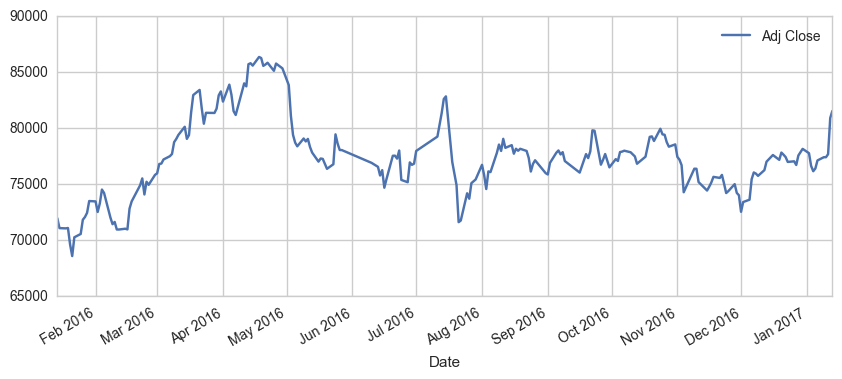

In [8]:
XU100['Adj Close'].plot(legend=True,figsize=(10,4))

#### Moving average (in pandas = rolling_mean)

In [9]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    XU100[column_name] = pd.rolling_mean(XU100['Adj Close'],ma)

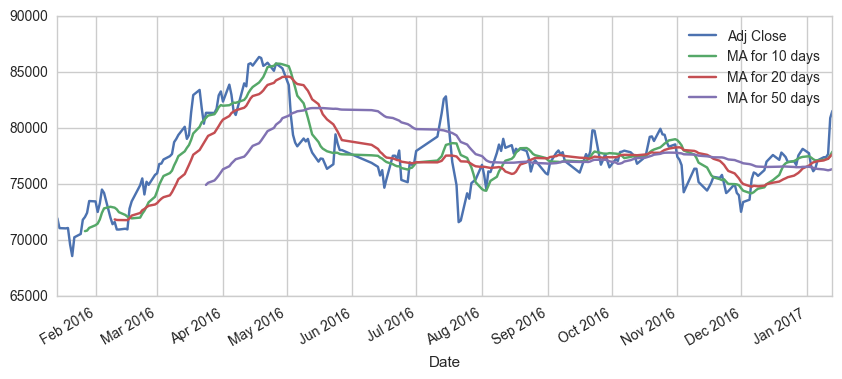

In [10]:
XU100[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

#### Daily Returns

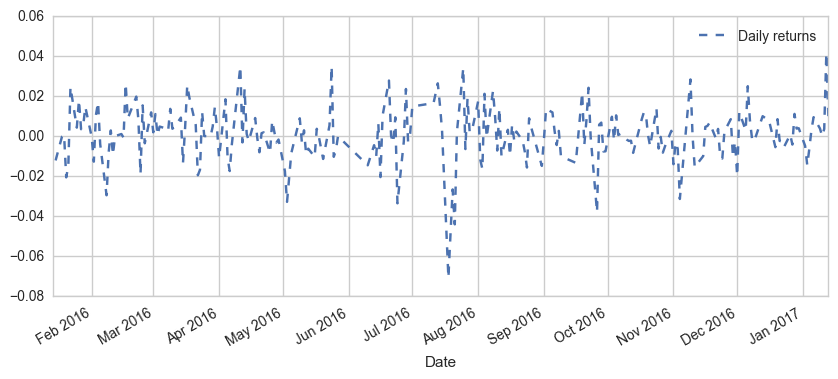

In [11]:
XU100['Daily returns'] = XU100['Adj Close'].pct_change()
# plotting
XU100['Daily returns'].plot(figsize=(10,4),legend=True,marker='o',linestyle='--')

RuntimeError: This functionality requires statsmodels 0.6 or later. You have 0.4.2

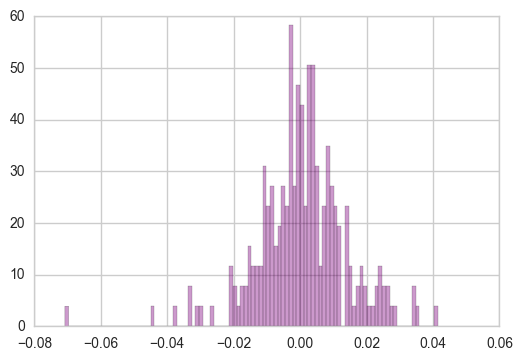

In [12]:
sns.distplot(XU100['Daily returns'].dropna(),bins=100,color='purple')